# 분석3 : PAD 에 따른 lab data 

## TOC
* [데이터 탐색](#Lab-data-살펴보기)
* [데이터 검정](#Lab-data-검정)
* [검정결과](#Lab-data-검정-결과)
* [분석3 : PAD 에 따른 lab data](#분석-3)
* [분석4 : CKD 수준별 CLI 에 따른 lab data](#분석-4)


In [1]:
#데이터 불러오기
library(xlsx)
library(dplyr)

data <- read.xlsx("../EPCinCKD_201802.xlsx", sheetIndex = 1)
data <- data[1:150,-c(1,2)]
colnames(data)[c(7, 13, 15, 16, 22)] <- c("HTN", "statin", "obesity", "PAD", "CD34.All")
data <- data %>% mutate( CLI = as.numeric(Group>=5))

Loading required package: rJava
Loading required package: xlsxjars

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## 분석 3

### PAD 집단과 비PAD 집단 사이의 lab 수치 비교


Average CFU, VEGF, VEGF/CD34, CD34, SDF-1, VEGF : 연속형 데이터

    => t-test

여러가지를 비교하기 때문에 다중 분석에 대한 보정 필요할것 


In [64]:
# PAD 그룹 별 비교 

cat("\n<PAD 그룹에 따른 Lab data 비교>\n")
data %>% 
    group_by( PAD ) %>%
    summarise( mean.Average.CFU = mean(Average.CFU, na.rm = T),
            mean.VEGF = mean(VEGF, na.rm = T),
            mean.CD34 = mean(CD34, na.rm = T),
            mean.VEGF.All = mean(VEGF.All, na.rm = T),
            mean.CD34.All = mean(CD34.All, na.rm = T),
            mean.VEGF.1 = mean(VEGF.1, na.rm = T),
            mean.SDF.1 = mean(SDF.1, na.rm = T)
             ) %>%
    mutate_if(is.numeric, funs(round(., 2)))


<PAD 그룹에 따른 Lab data 비교>


PAD,mean.Average.CFU,mean.VEGF,mean.CD34,mean.VEGF.All,mean.CD34.All,mean.VEGF.1,mean.SDF.1
0,4.50,4.63,0.42,4.96,0.75,92.25,2861.71
1,6.11,5.63,0.05,5.91,0.33,89.83,2611.55


CD34가 크게 차이나보인다. 



<PAD 그룹에 따른 Lab data 시각화>


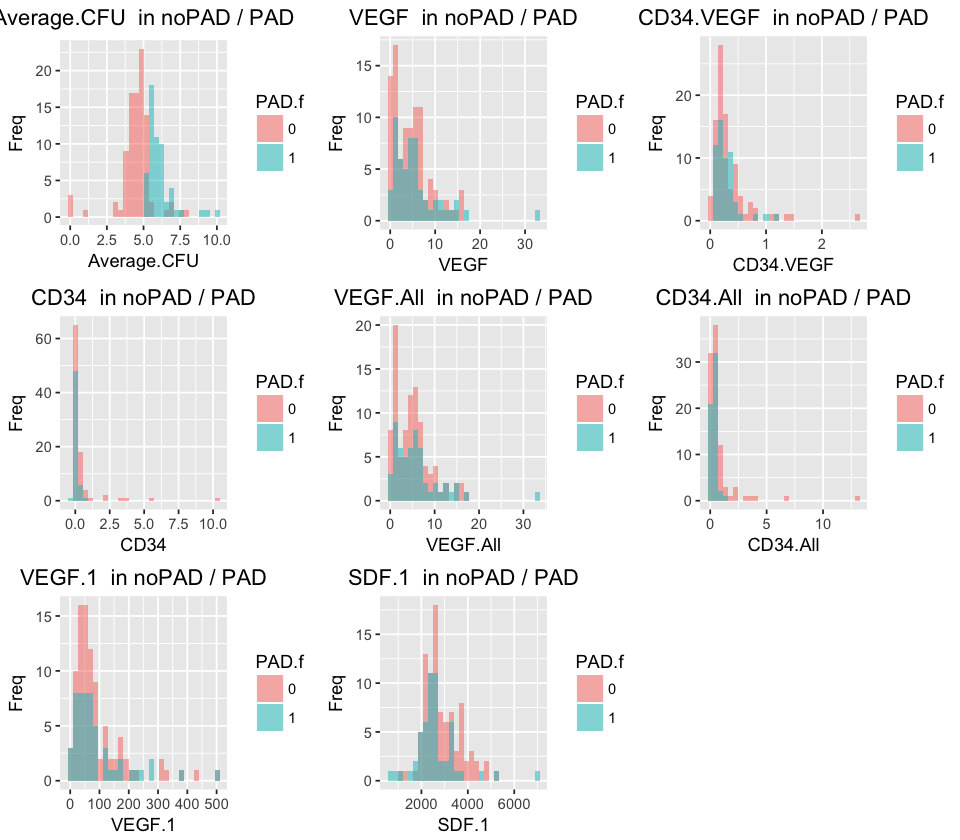

In [222]:
# 각각의 분포를 그려보기
plots <- list()

for(key in c('Average.CFU', 'VEGF', 'CD34.VEGF', 'CD34', 'VEGF.All', 'CD34.All', 'VEGF.1', 'SDF.1')){

    p<- data %>% 
        mutate(PAD.f = as.factor(PAD)) %>%
        ggplot(aes_string(x=key, fill = "PAD.f")) +
        geom_histogram(alpha=0.5, position="identity",bins = 30, na.rm = T) +  
        ggtitle(paste(key, " in noPAD / PAD")) +
        labs(x=key, y="Freq") +
        theme(plot.title = element_text(hjust = 0.5))
    
    plots[[key]] <- p
}

options(repr.plot.width=8, repr.plot.height=7)
cat("\n\n<PAD 그룹에 따른 Lab data 시각화>\n")
grid.arrange(grobs=plots, ncol=3)



<PAD 그룹에 따른 Lab data 정규성 시각화>


Warning message:
“Removed 5 rows containing non-finite values (stat_qq).”Warning message:
“Removed 5 rows containing non-finite values (stat_qq).”

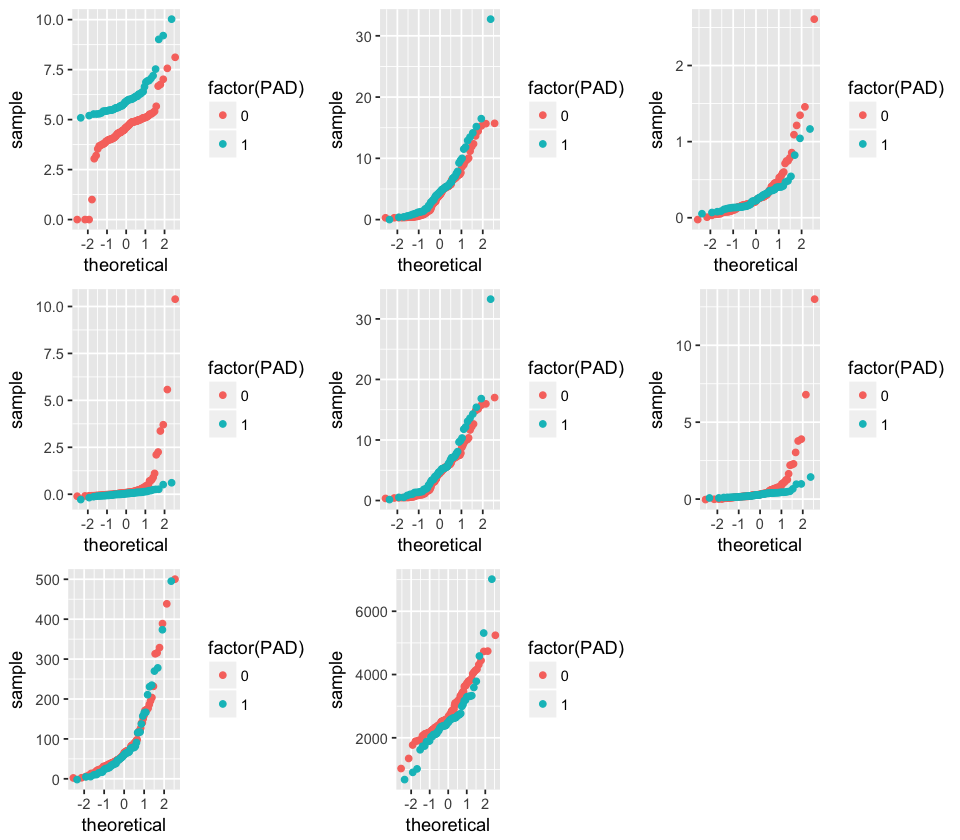

In [224]:
# 정규성 그래프

par(mfrow = c(3, 3))

for(key in c('Average.CFU', 'VEGF', 'CD34.VEGF', 'CD34', 'VEGF.All', 'CD34.All', 'VEGF.1', 'SDF.1')){
    p <- data %>% ggplot(aes_string(sample = key)) + stat_qq(aes(color=factor(PAD)))

    plots[[key]] <- p
}
options(repr.plot.width=8, repr.plot.height=7)
cat("\n\n<PAD 그룹에 따른 Lab data 정규성 시각화>\n")
grid.arrange(grobs=plots, ncol=3)

In [225]:
cat("\n<CLI 그룹에 따른 Lab data, 정규성 검정 결과>\n")
data %>% 
    group_by( PAD ) %>%
    summarise( Average.CFU = shapiro.test(Average.CFU)$p.value,
            VEGF = shapiro.test(VEGF)$p.value,
            CD34.VEGF = shapiro.test(CD34.VEGF)$p.value,
            CD34 = shapiro.test(CD34)$p.value,
            VEGF.All = shapiro.test(VEGF.All)$p.value,
            CD34.All = shapiro.test(CD34.All)$p.value,
            VEGF.1 = shapiro.test(VEGF.1)$p.value,
            SDF.1 = shapiro.test(SDF.1)$p.value
             ) %>%
    mutate_if(is.numeric, funs(round(., 4)))


<CLI 그룹에 따른 Lab data, 정규성 검정 결과>


PAD,Average.CFU,VEGF,CD34.VEGF,CD34,VEGF.All,CD34.All,VEGF.1,SDF.1
0,0,0,0,0e+00,0,0,0,0.0047
1,0,0,0,1e-04,0,0,0,0.0000


정규성을 만족하는 녀석들은 없다. 

In [226]:
cat("\n<CLI 그룹에 따른 로그변환 Lab data, 정규성 검정 결과>\n")
data %>% 
    group_by( PAD ) %>%
    summarise( log.Average.CFU = shapiro.test(log(Average.CFU))$p.value,
            log.VEGF = shapiro.test(log(VEGF))$p.value,
            log.CD34.VEGF = shapiro.test(log(CD34.VEGF))$p.value,
            log.CD34 = shapiro.test(log(CD34))$p.value,
            log.VEGF.All = shapiro.test(log(VEGF.All))$p.value,
            log.CD34.All = shapiro.test(log(CD34.All))$p.value,
            log.VEGF.1 = shapiro.test(log(VEGF.1))$p.value,
            log.SDF.1 = shapiro.test(log(SDF.1))$p.value
             ) %>%
    mutate_if(is.numeric, funs(round(., 4)))


<CLI 그룹에 따른 로그변환 Lab data, 정규성 검정 결과>


Warning message in log(CD34.VEGF):
“NaN이 생성되었습니다”Warning message in log(CD34):
“NaN이 생성되었습니다”Warning message in log(CD34):
“NaN이 생성되었습니다”Warning message in log(CD34.All):
“NaN이 생성되었습니다”Warning message in log(VEGF.1):
“NaN이 생성되었습니다”

PAD,log.Average.CFU,log.VEGF,log.CD34.VEGF,log.CD34,log.VEGF.All,log.CD34.All,log.VEGF.1,log.SDF.1
0,NaN,0,0.0473,0.0527,0.0001,0.0000,0.0048,0.0465
1,0,0,0.3911,0.8627,0.1099,0.3246,0.7121,0.0003


log 변환하면 정규성을 따른다고 볼만한 변수는 CD34 와 CD34.VEGF 이다. 

위 결과를 기반으로 하면 대부분의 변수에 wilcoxon rank sum 검정을 실시해야하고, 

CD 34 와 CD34.VEGF 만 로그 변환 후 t-test 를 시도해볼만한 가치가 있겠다. 

## Lab data 검정-PAD

In [227]:
# Wilcoxon rank sum test for lab data

for(key in c('Average.CFU', 'VEGF', 'CD34.VEGF', 'CD34', 'VEGF.All', 'CD34.All', 'VEGF.1', 'SDF.1')){
    test <- wilcox.test(data[key][,1], data["PAD"][,1])
    cat("\n", key, "result :", "p-value =", test$p.value, '\n')
}


 Average.CFU result : p-value = 9.315577e-50 

 VEGF result : p-value = 5.701746e-39 

 CD34.VEGF result : p-value = 1.95472e-05 

 CD34 result : p-value = 0.1107747 

 VEGF.All result : p-value = 3.615288e-41 

 CD34.All result : p-value = 3.787344e-06 

 VEGF.1 result : p-value = 1.883617e-50 

 SDF.1 result : p-value = 8.020571e-52 


In [161]:
# log 값에 대한 분석 

for(key in c('Average.CFU', 'VEGF', 'CD34.VEGF', 'CD34', 'VEGF.All', 'CD34.All', 'VEGF.1', 'SDF.1')){
    test <- wilcox.test(log(data[key][,1]), data["CLI"][,1])
    cat("\n", key, "result :", "p-value =", test$p.value, '\n')
}


 Average.CFU result : p-value = 6.33222e-51 

 VEGF result : p-value = 1.554135e-12 


Warning message in log(data[key][, 1]):
“NaN이 생성되었습니다”


 CD34.VEGF result : p-value = 4.537223e-47 


Warning message in log(data[key][, 1]):
“NaN이 생성되었습니다”


 CD34 result : p-value = 4.270463e-35 

 VEGF.All result : p-value = 2.720166e-15 


Warning message in log(data[key][, 1]):
“NaN이 생성되었습니다”


 CD34.All result : p-value = 1.566129e-38 


Warning message in log(data[key][, 1]):
“NaN이 생성되었습니다”


 VEGF.1 result : p-value = 3.590014e-50 

 SDF.1 result : p-value = 1.492223e-51 
